In [1]:
from animal_soup import *
import pandas as pd
import numpy as np
import os

# Paths

Will need to set paths according to your own data storage location. Data should be stored in the following format:

Example:

`/home/{user}/data/`

    `animal_id/`

        `session_id/`
            
            `trial_vid1`
            
            `trial_vid2`
            
            ...

        `session_id/`
            
            `trial_vid1`
            
            `trial_vid2`
            
            ...

        ...

`set_parent_raw_data_path()` - This function from `animal_soup` (modeled from `mesmerize_core`) sets the top level raw data directory. This should be set to the top level directory where your behavioral data is stored. This allows you to move your behavioral data directory structure between computers, as long as you keep everything under the parent path the same.

In [2]:
# for this demo set this dir as the path to your `animal_soup` sample data folder
set_parent_raw_data_path('/home/clewis7/repos/animal-soup/tests/sample_data/')

PosixPath('/home/clewis7/repos/animal-soup/tests/sample_data')

### Dataframe path, this is where your ethograms will be organized

This can be anywhere, it does not need to be under the parent raw data path.

In [3]:
df_path = '/home/clewis7/Desktop/sample_df.hdf'

# Create a new dataframe

This will create a new pandas `DataFrame` with the columns necessary for `animal_soup`. You can additional columns as necessary, but do not modify the columns used by `animal_soup`.

<b> Note: you will need to use `load_df()` to load the dataframe later. You can use `create_df()` to overwrite an existing behavior dataframe by using the kward `remove_existing=True`.  <b> 

In [4]:
# create a new batch
df = create_df(df_path, remove_existing=True)
# load an existing batch use `load_df()`
#df = load_df(df_path)

# View the dataframe

It is empty with the appropriate columns for `animal_soup`

In [5]:
df

,animal_id,session_id,trial_id,vid_path,output_path,exp_type,model_params,notes


# Adding items to the dataframe

Add an item to the dataframe using a pandas dataframe extension access modifier. 

Can add all sessions for a given animal or simply add a single animal/session. 

In [ ]:
# add all sessions for a given animal_id
df.behavior.add_item(animal_id="M232Slc17a7_Gtacr2", exp_type="table")

# add a single session for a given animal_id
df.behavior.add_item(animal_id='M234Slc17a7_Gtacr2', session_id='20170328', exp_type='table')

# add a single trial for a given animal_id and session_id
df.behavior.add_item(animal_id='M234Slc17a7_Gtacr2', 
                     session_id='20170329', 
                     trial_id='M234_20170329_v003', 
                     exp_type='table'
                    )

In [ ]:
df

# Removing items from the dataframe

Remove items from the dataframe using a pandas dataframe extension access modifier.

Can remove all sessions for a given animal or simply remove a single animal/session.

In [ ]:
# remove item by index
df.behavior.remove_item(row_ix=0)

# remove all sessions for a given animal
df.behavior.remove_item(animal_id='M232Slc17a7_Gtacr2')

# remove single session for a given animal
df.behavior.remove_item(animal_id='M234Slc17a7_Gtacr2', session_id='20170328')

# remove single trial for given animal/session 
df.behavior.remove_item(animal_id='M234Slc17a7_Gtacr2', 
                        session_id='20170329', 
                        trial_id='M234_20170329_v003')

In [ ]:
df

# Add a single session for inference

In [6]:
# add a single session for a given animal_id
df.behavior.add_item(animal_id='M234Slc17a7_Gtacr2', session_id='20170328', exp_type='table')

# View behavior videos

Using `ipydatagrid` and `fastplotlib` can view behavior data. Allows movement across trials in each animal/session.

In [7]:
df.behavior.view(ethogram_view=False).show()

/home/clewis7/venvs/ansoup/lib/python3.11/site-packages/ipydatagrid/datagrid.py:445: UserWarning: Index name of 'index' is not round-trippable.
  schema = pd.io.json.build_table_schema(dataframe)


RFBOutputContext()

/home/clewis7/repos/animal-soup/animal_soup/arrays/_video.py:96: UserWarning: min not implemented for LazyTiff, returning min of 0th index
  warn("min not implemented for LazyTiff, returning min of 0th index")
/home/clewis7/repos/animal-soup/animal_soup/arrays/_video.py:101: UserWarning: max not implemented for LazyTiff, returning min of 0th index
  warn("max not implemented for LazyTiff, returning min of 0th index")


# Run Inference

Predict behavior by calling `pandas.Series extension`. Here using default `mode='fast'`.

In [8]:
for ix, row in df.iterrows():
    row.behavior.infer()

Successfully loaded flow generator model from checkpoint!
Successfully loaded flow classifier from checkpoint!
Successfully loaded spatial classifier from checkpoint!
Successfully fused the flow classifier and spatial classifier models!
Successfully reloaded hidden two stream model!
Calculating vid normalization statistics


100%|████████████████████████████████████| 151/151 [00:00<00:00, 178.58it/s]


Successfully saved feature extraction output to disk!
Successfully loaded sequence model from checkpoint!
Successfully saved sequence outputs to disk!
Successfully ran feature extraction and sequence inference.
Successfully loaded flow generator model from checkpoint!
Successfully loaded flow classifier from checkpoint!
Successfully loaded spatial classifier from checkpoint!
Successfully fused the flow classifier and spatial classifier models!
Successfully reloaded hidden two stream model!
Calculating vid normalization statistics


100%|████████████████████████████████████| 152/152 [00:00<00:00, 175.30it/s]


Successfully saved feature extraction output to disk!
Successfully loaded sequence model from checkpoint!
Successfully saved sequence outputs to disk!
Successfully ran feature extraction and sequence inference.
Successfully loaded flow generator model from checkpoint!
Successfully loaded flow classifier from checkpoint!
Successfully loaded spatial classifier from checkpoint!
Successfully fused the flow classifier and spatial classifier models!
Successfully reloaded hidden two stream model!
Calculating vid normalization statistics


100%|████████████████████████████████████| 227/227 [00:01<00:00, 172.50it/s]
                                                                            

Successfully saved feature extraction output to disk!
Successfully loaded sequence model from checkpoint!
Successfully saved sequence outputs to disk!
Successfully ran feature extraction and sequence inference.


# View Inference Results

In [9]:
df.behavior.view().show()

/home/clewis7/venvs/ansoup/lib/python3.11/site-packages/ipydatagrid/datagrid.py:445: UserWarning: Index name of 'index' is not round-trippable.
  schema = pd.io.json.build_table_schema(dataframe)


RFBOutputContext()

/home/clewis7/repos/animal-soup/animal_soup/arrays/_video.py:96: UserWarning: min not implemented for LazyTiff, returning min of 0th index
  warn("min not implemented for LazyTiff, returning min of 0th index")
/home/clewis7/repos/animal-soup/animal_soup/arrays/_video.py:101: UserWarning: max not implemented for LazyTiff, returning min of 0th index
  warn("max not implemented for LazyTiff, returning min of 0th index")


RFBOutputContext()

# Clean ethograms 

In [10]:
df.behavior.clean_ethograms().show()

/home/clewis7/venvs/ansoup/lib/python3.11/site-packages/ipydatagrid/datagrid.py:445: UserWarning: Index name of 'index' is not round-trippable.
  schema = pd.io.json.build_table_schema(dataframe)


RFBOutputContext()

/home/clewis7/repos/animal-soup/animal_soup/arrays/_video.py:96: UserWarning: min not implemented for LazyTiff, returning min of 0th index
  warn("min not implemented for LazyTiff, returning min of 0th index")
/home/clewis7/repos/animal-soup/animal_soup/arrays/_video.py:101: UserWarning: max not implemented for LazyTiff, returning min of 0th index
  warn("max not implemented for LazyTiff, returning min of 0th index")


RFBOutputContext()

# Training

If you wanted to train one of the models, such as the flow generator.

In [11]:
df

,animal_id,session_id,trial_id,vid_path,output_path,exp_type,model_params,notes
0,M234Slc17a7_Gtacr2,20170328,M234_20170328_v002,M234Slc17a7_Gtacr2/20170328/M234_20170328_v002...,M234Slc17a7_Gtacr2/20170328/outputs.h5,table,{},None
1,M234Slc17a7_Gtacr2,20170328,M234_20170328_v004,M234Slc17a7_Gtacr2/20170328/M234_20170328_v004...,M234Slc17a7_Gtacr2/20170328/outputs.h5,table,{},None
2,M234Slc17a7_Gtacr2,20170328,M234_20170328_v005,M234Slc17a7_Gtacr2/20170328/M234_20170328_v005...,M234Slc17a7_Gtacr2/20170328/outputs.h5,table,{},None


Successfully loaded flow generator model from checkpoint!
Calculating normalization statistics based on trials in dataframe


100%|████████████████████████████████████| 227/227 [00:01<00:00, 174.04it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Missing logger folder: /home/clewis7/Desktop/flow_gen_output/flow_gen_train_logs


Starting training
Model Parameters:
{'Mode': 'fast',
 'Model': 'TinyMotionNet',
 'Output Path': PosixPath('/home/clewis7/Desktop/flow_gen_output'),
 'Parameters': {'batch_size': 32,
                'flow_window': 11,
                'image_augmentations': {'LR': 0.5,
                                        'UD': 0.0,
                                        'brightness': 0.25,
                                        'color_p': 0.5,
                                        'contrast': 0.1,
                                        'crop_size': None,
                                        'degrees': 10,
                                        'grayscale': 0.5,
                                        'hue': 0.1,
                                        'normalization': {'N': 105830400,
                                                          'mean': array([0.03722183, 0.03722183, 0.03722183]),
                                                          'std': array([0.05741804, 0.05741804, 0.0

2023-08-03 10:42:17.259688: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 10:42:17.738384: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name           | Type          | Params
-------------------------------------------------
0 | model          | TinyMotionNet | 2.0 M 
1 | gpu_transforms | Sequential    | 0     
2 | criterion      | MotionNetLoss | 0     
-------------------------------------------------
2.0 M     Trainable params
0         Non-trainable params
2.0 M     Total params
7.807     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Epoch: 0 
Train Loss: 0.0172


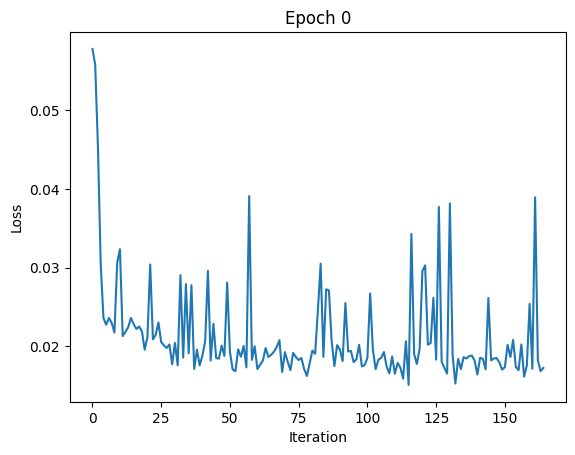

Epoch: 1 
Train Loss: 0.0172


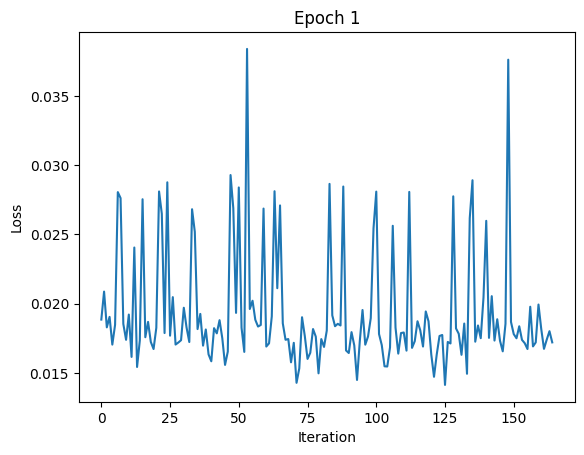

Epoch: 2 
Train Loss: 0.0281


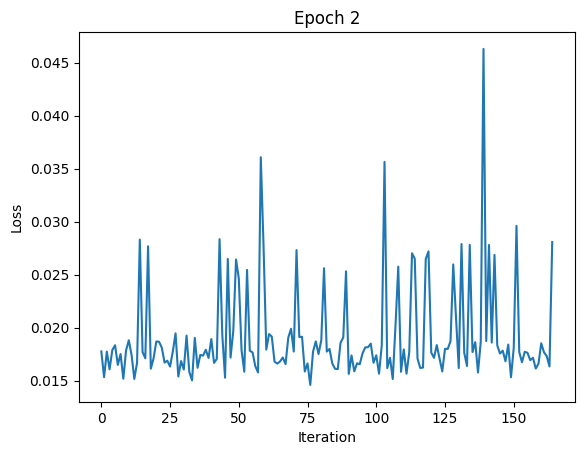

Epoch: 3 
Train Loss: 0.0189


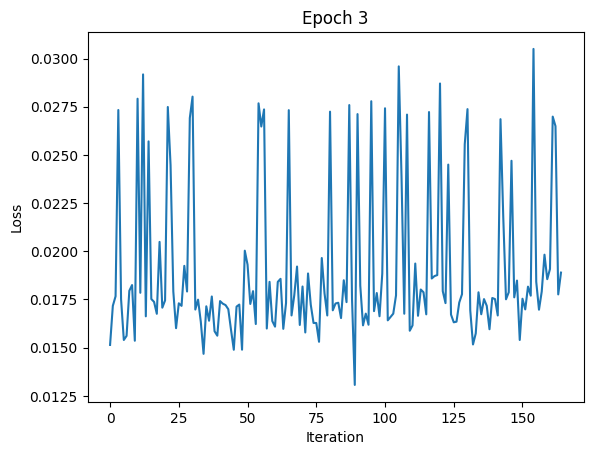

Epoch: 4 
Train Loss: 0.0155


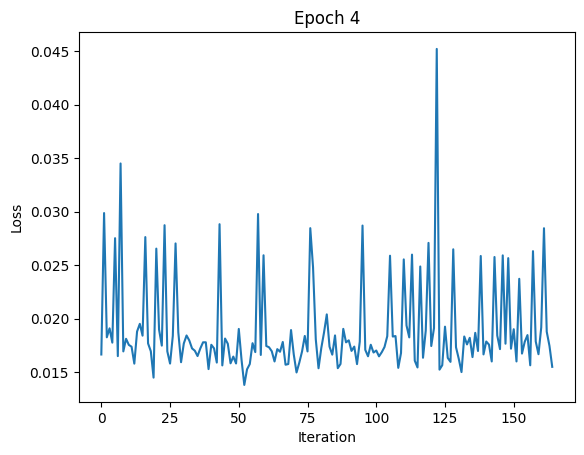

Epoch: 5 
Train Loss: 0.0360


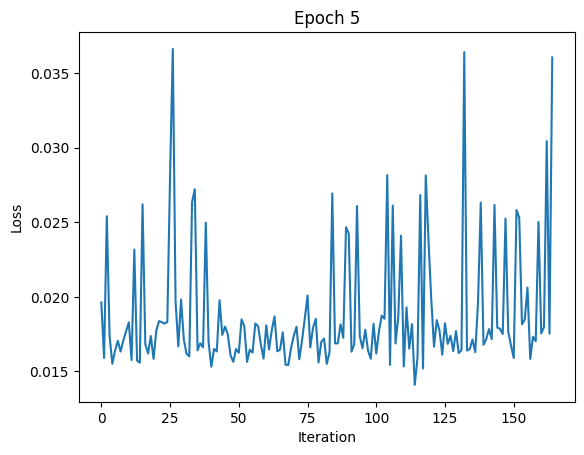

In [ ]:
df.flow_generator.train(mode="fast")